In [6]:
!python --version

Python 3.14.0


In [ ]:
!pip list

In [9]:
!conda --version

conda 25.9.1


In [10]:
!conda env list


# conda environments:
#
# *  -> active
# + -> frozen
base                     C:\Files\Softwares\miniconda3
midterm_proj         *   C:\Files\Softwares\miniconda3\envs\midterm_proj



In [2]:
# All imports here

import pandas as pd
import numpy as np

In [3]:
# All constants here
DATA_LOCATION = '..\\Data\\'
FILE_NAME = 'InputFile'
FILE_TYPE ='.csv'
INTERMEDIARY_FILE = 'checking.csv'

# All variables here
df = []

In [21]:
def reload_df():
    global df
    df = pd.read_csv(DATA_LOCATION + FILE_NAME + FILE_TYPE)
reload_df()
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [22]:
# confirmation of Unix time accuracy

df['val_date'] = pd.to_datetime(df['UNIXTime'], unit='s')

In [23]:
df.columns = df.columns.str.lower()

# brackets present so...

df.rename(columns={'winddirection(degrees)': 'winddirection'}, inplace=True)
df

,unixtime,data,time,radiation,temperature,pressure,humidity,winddirection,speed,timesunrise,timesunset,val_date
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,2016-09-30 09:55:26
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,2016-09-30 09:50:23
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,2016-09-30 09:45:26
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,2016-09-30 09:40:21
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,2016-09-30 09:35:24
...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00,2016-12-01 10:20:04
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00,2016-12-01 10:15:01
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00,2016-12-01 10:10:01
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00,2016-12-01 10:05:02


## Next step
1. To calculate total sunlight time from sunset, sunrise difference
2. The time data was measured has impact but by how much
3. To plot and get the correlation between each feature
4. How much impact each feature has on target feature
...
N. Which regressor to use

In [24]:
# order by unix time

df.sort_values(by='unixtime', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,unixtime,data,time,radiation,temperature,pressure,humidity,winddirection,speed,timesunrise,timesunset,val_date
0,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00,2016-09-01 10:00:08
1,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00,2016-09-01 10:05:10
2,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00,2016-09-01 10:20:06
3,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00,2016-09-01 10:25:05
4,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00,2016-09-01 10:30:09
...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1483263302,12/31/2016 12:00:00 AM,23:35:02,1.22,41,30.34,83,238.94,6.75,06:57:00,17:54:00,2017-01-01 09:35:02
32682,1483263601,12/31/2016 12:00:00 AM,23:40:01,1.21,41,30.34,82,236.79,5.62,06:57:00,17:54:00,2017-01-01 09:40:01
32683,1483263904,12/31/2016 12:00:00 AM,23:45:04,1.21,42,30.34,81,218.28,7.87,06:57:00,17:54:00,2017-01-01 09:45:04
32684,1483264203,12/31/2016 12:00:00 AM,23:50:03,1.19,41,30.34,80,215.23,7.87,06:57:00,17:54:00,2017-01-01 09:50:03


In [25]:
# 1. Convert the UNIXTime column to a proper Pandas datetime object (in seconds)
# df['RecordedDateTime'] = pd.to_datetime(df['unixtime'], unit='s')

df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['data'] = pd.to_datetime(df['data'], errors='coerce')

# 2. Extract the individual components using the .dt accessor
df['recorded_year'] = df['data'].dt.year
df['recorded_month'] = df['data'].dt.month
df['recorded_day'] = df['data'].dt.day
df['recorded_hour'] = df['time'].dt.hour
df['recorded_minute'] = df['time'].dt.minute
df['recorded_second'] = df['time'].dt.second

# Optional: Drop the intermediate datetime column if you don't need it
df.drop(columns = ['unixtime','data','time'],inplace=True)
df

C:\Users\User 1\AppData\Local\Temp\ipykernel_4320\269950647.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'], errors='coerce')
C:\Users\User 1\AppData\Local\Temp\ipykernel_4320\269950647.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['data'] = pd.to_datetime(df['data'], errors='coerce')


,radiation,temperature,pressure,humidity,winddirection,speed,timesunrise,timesunset,val_date,recorded_year,recorded_month,recorded_day,recorded_hour,recorded_minute,recorded_second
0,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00,2016-09-01 10:00:08,2016,9,1,0,0,8
1,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00,2016-09-01 10:05:10,2016,9,1,0,5,10
2,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00,2016-09-01 10:20:06,2016,9,1,0,20,6
3,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00,2016-09-01 10:25:05,2016,9,1,0,25,5
4,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00,2016-09-01 10:30:09,2016,9,1,0,30,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1.22,41,30.34,83,238.94,6.75,06:57:00,17:54:00,2017-01-01 09:35:02,2016,12,31,23,35,2
32682,1.21,41,30.34,82,236.79,5.62,06:57:00,17:54:00,2017-01-01 09:40:01,2016,12,31,23,40,1
32683,1.21,42,30.34,81,218.28,7.87,06:57:00,17:54:00,2017-01-01 09:45:04,2016,12,31,23,45,4
32684,1.19,41,30.34,80,215.23,7.87,06:57:00,17:54:00,2017-01-01 09:50:03,2016,12,31,23,50,3


In [ ]:
df['Col1_DT'] = pd.to_datetime(df['data'])
df['Col2_DT'] = pd.to_datetime(df['val_date'])

# 2. Extract the date component and compare
# .dt.date extracts only the YYYY-MM-DD portion.
mismatch_count = ((df['Col1_DT'].dt.date == df['Col2_DT'].dt.date)).sum()

print(f"Total number of rows where the date parts DO NOT match: {mismatch_count}")

In [102]:
'''
df['Col1_DT'] = pd.to_datetime(df['data'])
df['Col2_DT'] = pd.to_datetime(df['val_date'])

# 2. Create a Boolean Series where True means the dates DO NOT match
mismatch_series = (df['Col1_DT'].dt.date != df['Col2_DT'].dt.date)

# 3. Find the index of the first True (first mismatch)
# .idxmax() returns the index of the first True value
first_mismatch_index = mismatch_series.idxmax()

# 4. Use .loc to retrieve the entire row at that index
first_mismatch_row = df.loc[first_mismatch_index]

print("First row where the date parts DO NOT match:")
print(first_mismatch_row)
'''

First row where the date parts DO NOT match:
unixtime                     1472774407
data               9/1/2016 12:00:00 AM
time                           14:00:07
radiation                         972.4
temperature                          62
pressure                          30.43
humidity                             57
winddirection                     104.9
speed                               4.5
timesunrise                    06:07:00
timesunset                     18:38:00
val_date            2016-09-02 00:00:07
recorded_year                      2016
recorded_month                        9
recorded_day                          2
recorded_hour                         0
recorded_minute                       0
recorded_second                       7
Col1_DT             2016-09-01 00:00:00
Col2_DT             2016-09-02 00:00:07
Name: 139, dtype: object


C:\Users\User 1\AppData\Local\Temp\ipykernel_17300\3209486388.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Col1_DT'] = pd.to_datetime(df['data'])


In [26]:
#since unix time dont match the said data, unix time wont be taken into consideration
df['Sunrise_TD'] = pd.to_timedelta(df['timesunrise'])
df['Sunset_TD'] = pd.to_timedelta(df['timesunset'])

# 2. Calculate the difference to get the total duration of daylight
df['Daylight_Duration_TD'] = df['Sunset_TD'] - df['Sunrise_TD']

# 3. Convert the duration to a numerical feature (Total Hours)
# This is the ideal format for machine learning models.
df['Daylight_Hours'] = df['Daylight_Duration_TD'].dt.total_seconds() / 3600

df['timesunrise'] = pd.to_datetime(df['timesunrise'], errors='coerce')
df['timesunset'] = pd.to_datetime(df['timesunset'], errors='coerce')

# 2. Extract the individual components using the .dt accessor
df['sunrise_hour'] = df['timesunrise'].dt.hour
df['sunrise_minutes'] = df['timesunrise'].dt.minute
df['sunrise_seconds'] = df['timesunrise'].dt.second
df['sunset_hour'] = df['timesunset'].dt.hour
df['sunset_minutes'] = df['timesunset'].dt.minute
df['sunset_seconds'] = df['timesunset'].dt.second

# Optional: Drop the intermediate datetime column if you don't need it
df.drop(columns = ['timesunrise','timesunset','val_date','Sunrise_TD','Sunset_TD','Daylight_Duration_TD'],inplace=True)

df

C:\Users\User 1\AppData\Local\Temp\ipykernel_4320\4183103722.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timesunrise'] = pd.to_datetime(df['timesunrise'], errors='coerce')
C:\Users\User 1\AppData\Local\Temp\ipykernel_4320\4183103722.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timesunset'] = pd.to_datetime(df['timesunset'], errors='coerce')


,radiation,temperature,pressure,humidity,winddirection,speed,recorded_year,recorded_month,recorded_day,recorded_hour,recorded_minute,recorded_second,Daylight_Hours,sunrise_hour,sunrise_minutes,sunrise_seconds,sunset_hour,sunset_minutes,sunset_seconds
0,2.58,51,30.43,103,77.27,11.25,2016,9,1,0,0,8,12.516667,6,7,0,18,38,0
1,2.83,51,30.43,103,153.44,9.00,2016,9,1,0,5,10,12.516667,6,7,0,18,38,0
2,2.16,51,30.43,103,142.04,7.87,2016,9,1,0,20,6,12.516667,6,7,0,18,38,0
3,2.21,51,30.43,103,144.12,18.00,2016,9,1,0,25,5,12.516667,6,7,0,18,38,0
4,2.25,51,30.43,103,67.42,11.25,2016,9,1,0,30,9,12.516667,6,7,0,18,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1.22,41,30.34,83,238.94,6.75,2016,12,31,23,35,2,10.950000,6,57,0,17,54,0
32682,1.21,41,30.34,82,236.79,5.62,2016,12,31,23,40,1,10.950000,6,57,0,17,54,0
32683,1.21,42,30.34,81,218.28,7.87,2016,12,31,23,45,4,10.950000,6,57,0,17,54,0
32684,1.19,41,30.34,80,215.23,7.87,2016,12,31,23,50,3,10.950000,6,57,0,17,54,0


In [27]:
df.describe()

,radiation,temperature,pressure,humidity,winddirection,speed,recorded_year,recorded_month,recorded_day,recorded_hour,recorded_minute,recorded_second,Daylight_Hours,sunrise_hour,sunrise_minutes,sunrise_seconds,sunset_hour,sunset_minutes,sunset_seconds
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.0,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.0,32686.000000,32686.0,32686.000000,32686.000000,32686.0
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,2016.0,10.526066,15.825766,11.557425,27.556691,17.441902,11.509176,6.0,27.640519,0.0,17.347886,37.317904,0.0
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,0.0,1.096691,8.711824,6.912034,17.268507,12.951109,0.498854,0.0,15.518714,0.0,0.476307,15.938416,0.0
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,2016.0,9.000000,1.000000,0.000000,0.000000,0.000000,10.933333,6.0,7.000000,0.0,17.000000,0.000000,0.0
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,2016.0,10.000000,9.000000,6.000000,15.000000,5.000000,11.033333,6.0,14.000000,0.0,17.000000,26.000000,0.0
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,2016.0,11.000000,16.000000,12.000000,30.000000,18.000000,11.400000,6.0,24.000000,0.0,17.000000,43.000000,0.0
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,2016.0,11.000000,23.000000,18.000000,45.000000,22.000000,11.916667,6.0,40.000000,0.0,18.000000,48.000000,0.0
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,2016.0,12.000000,31.000000,23.000000,57.000000,59.000000,12.516667,6.0,57.000000,0.0,18.000000,59.000000,0.0


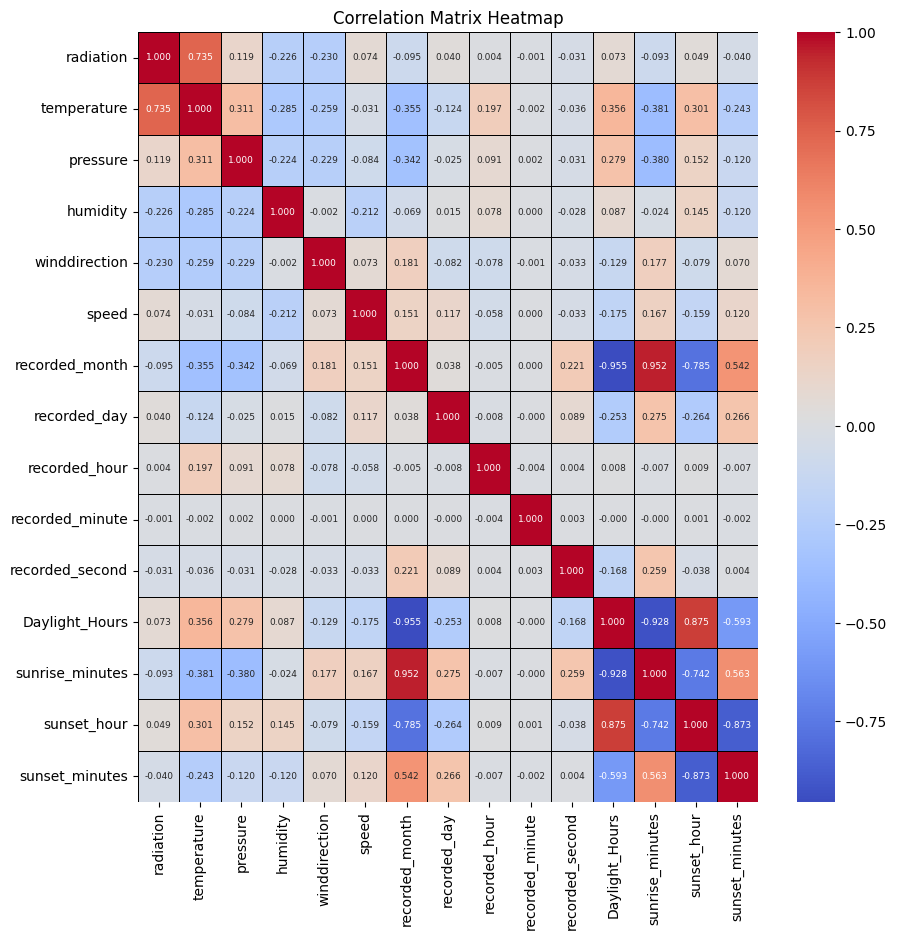

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculate the Correlation Matrix
correlation_matrix = df.corr()

# 2. Set up the Matplotlib figure
plt.figure(figsize=(10, 10)) # Adjust size for readability

# 3. Create the Heatmap using Seaborn
sns.heatmap(
    correlation_matrix,
    annot=True,       # Show the correlation values on the heatmap
    fmt=".3f",        # Format the numbers to 2 decimal places
    cmap="coolwarm",  # Color map (cool to warm, for blue=negative, red=positive)
    cbar=True,        # Show the color bar
    linewidths=.5,    # Lines between cells
    linecolor='black', # Color of the lines
    annot_kws={"fontsize": 6.5}
)

# 4. Add a title and display the plot
plt.title('Correlation Matrix Heatmap')
plt.show() # In a notebook environment, use plt.show()
# If saving the file: plt.savefig('correlation_heatmap.png')

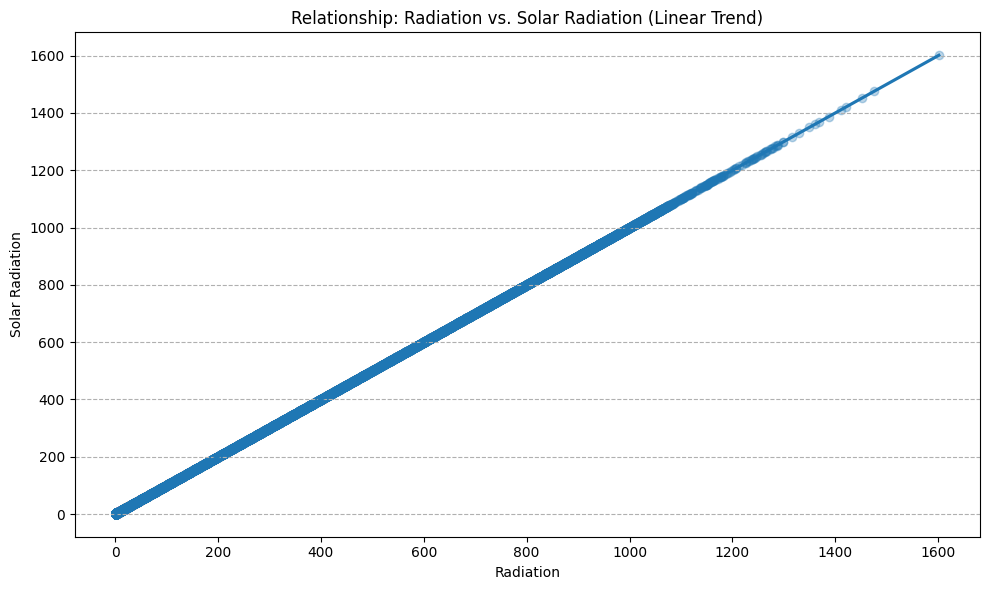

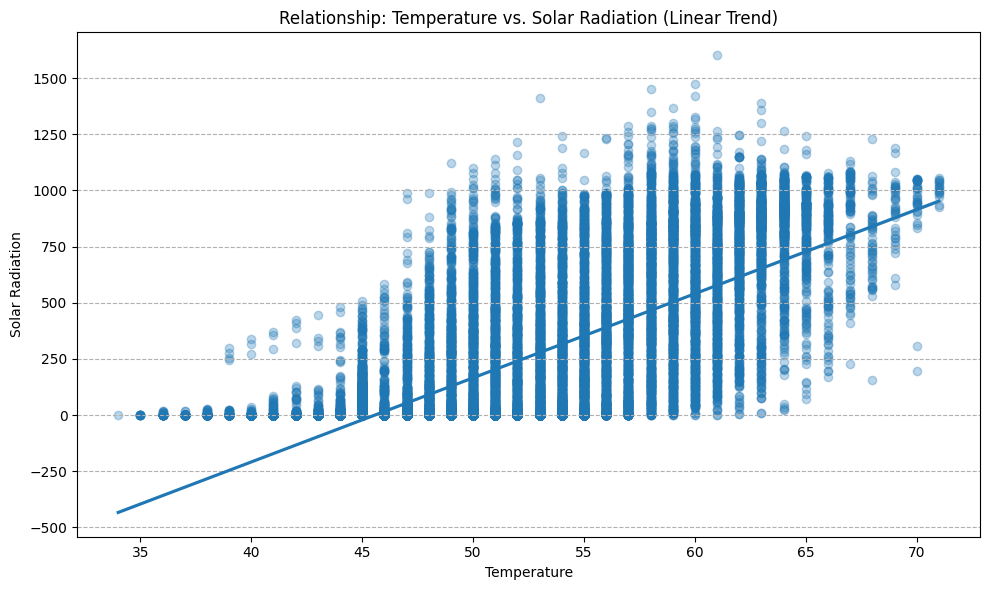

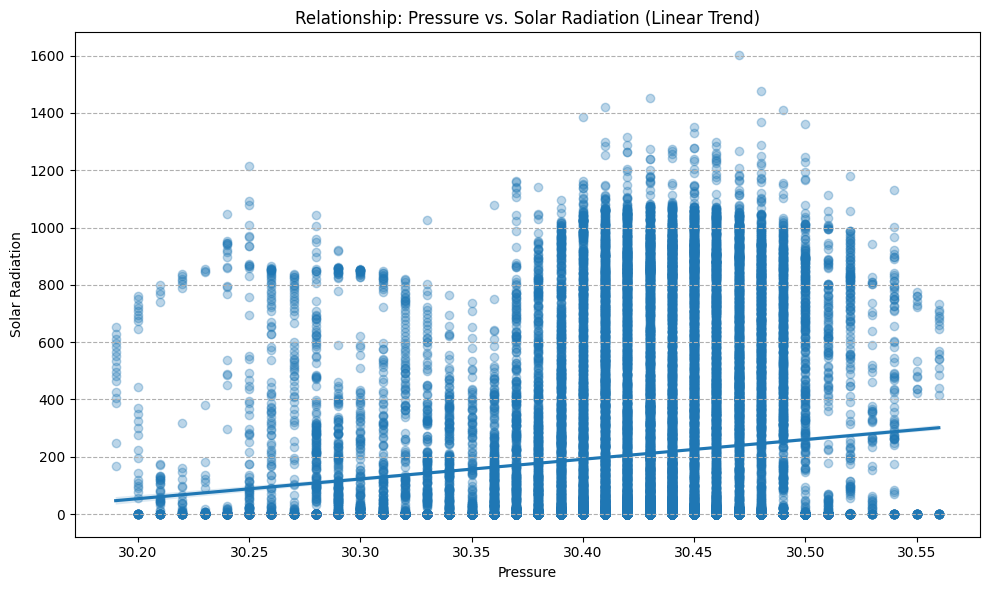

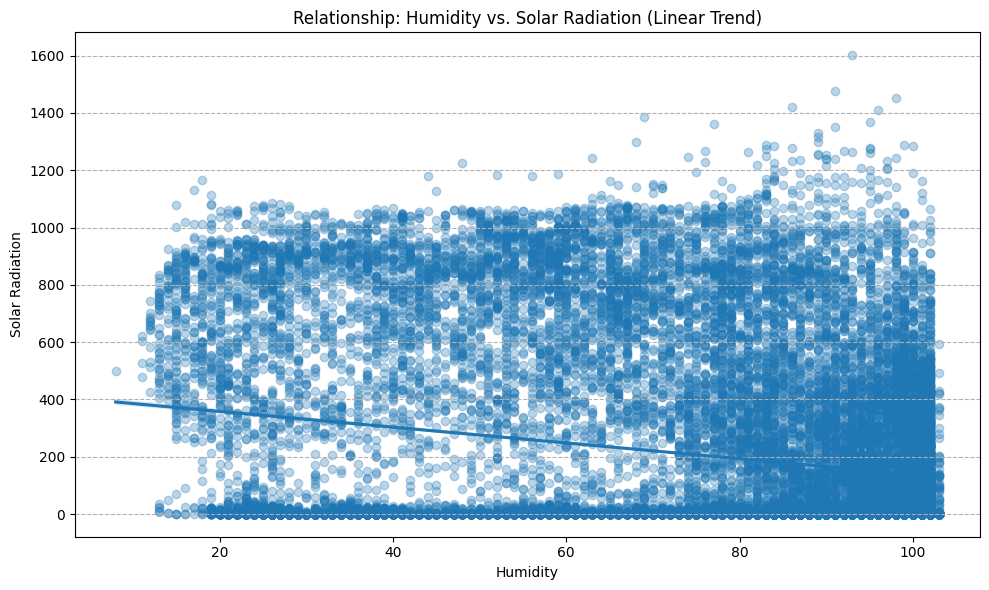

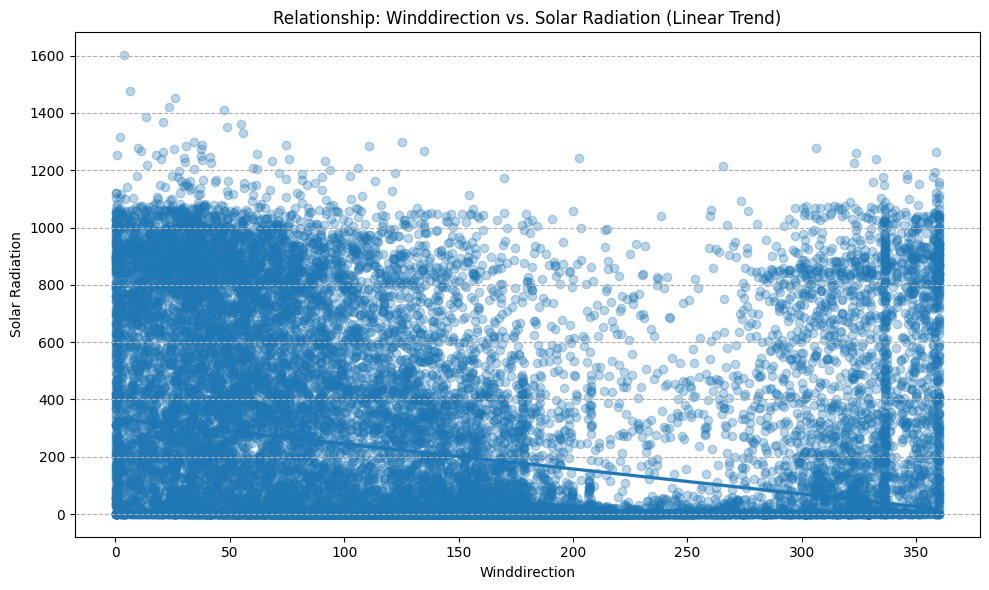

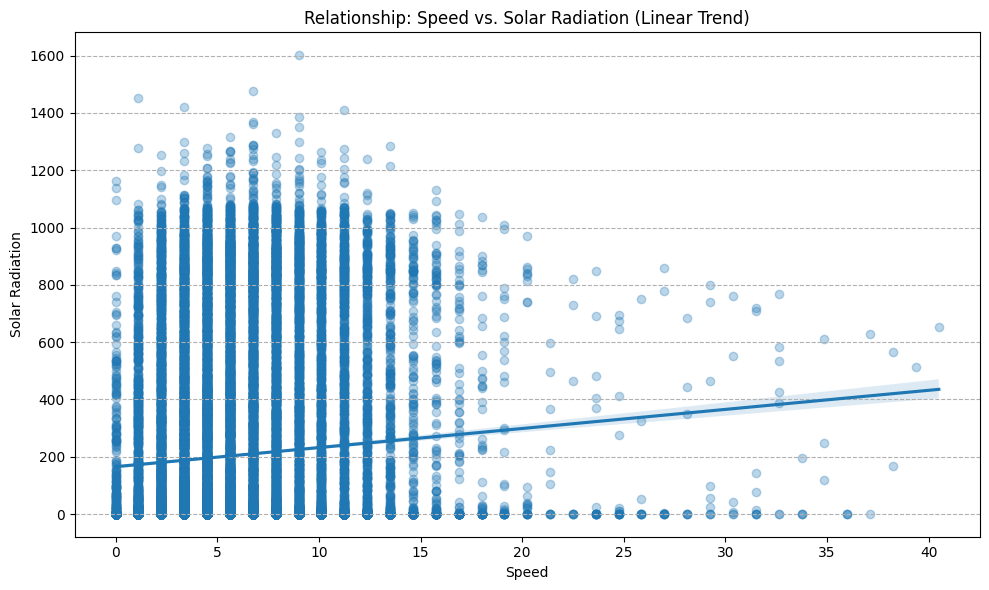

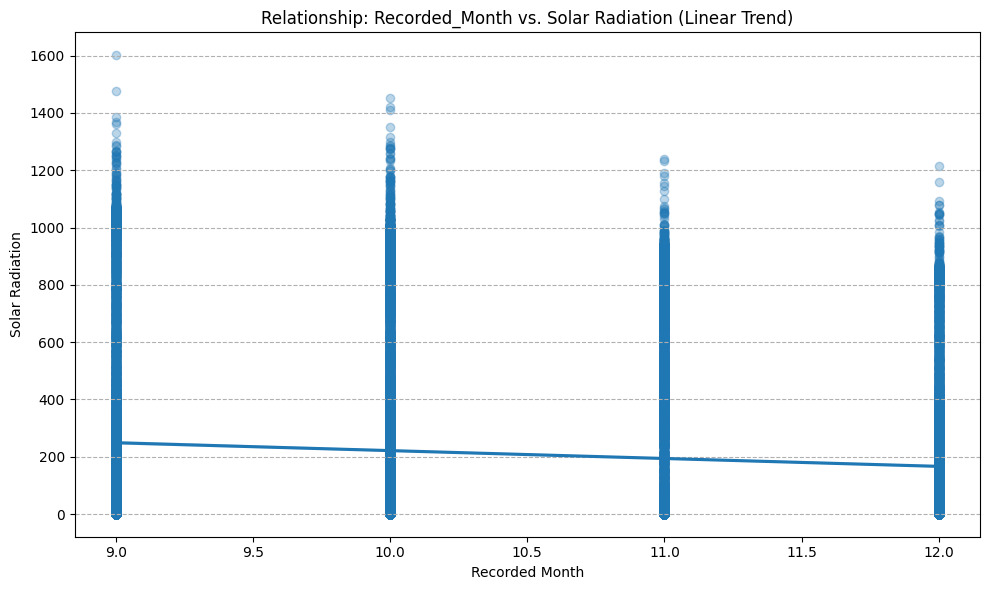

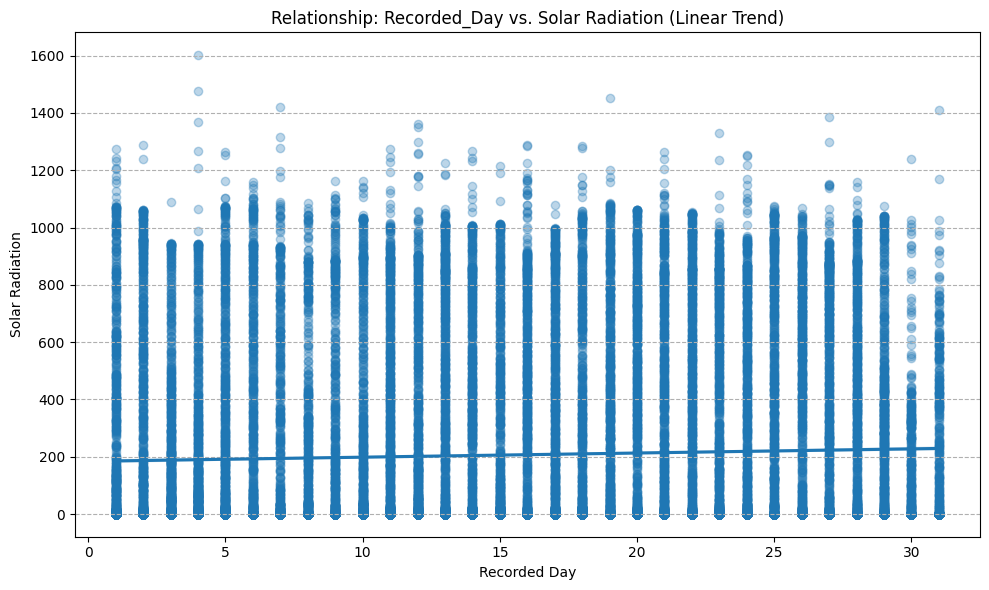

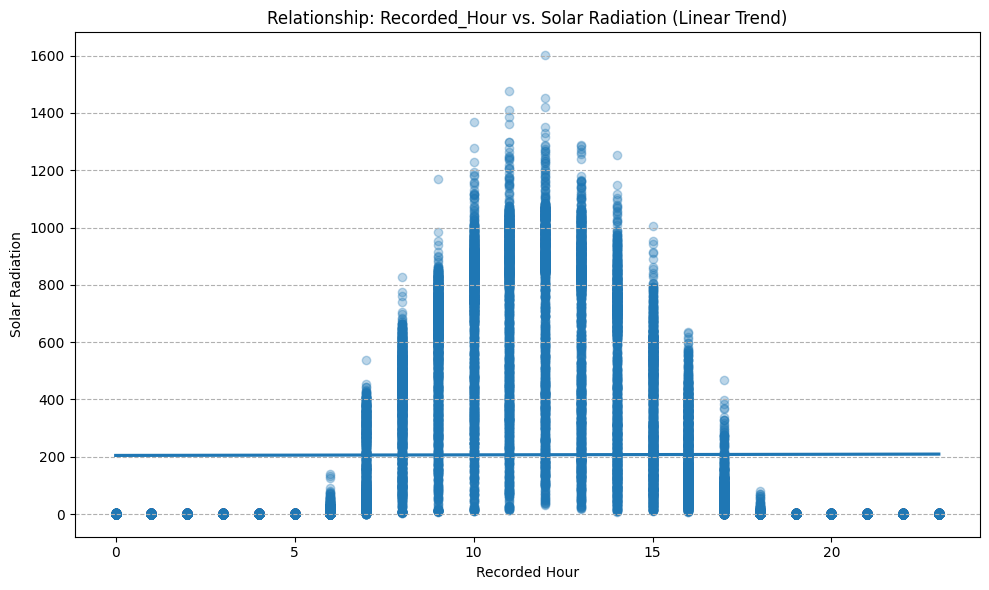

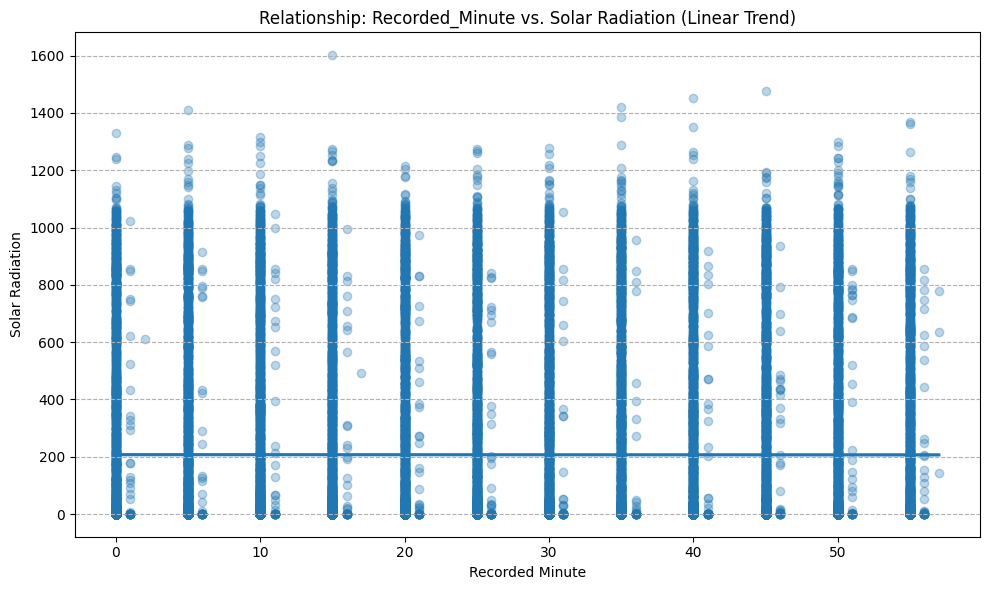

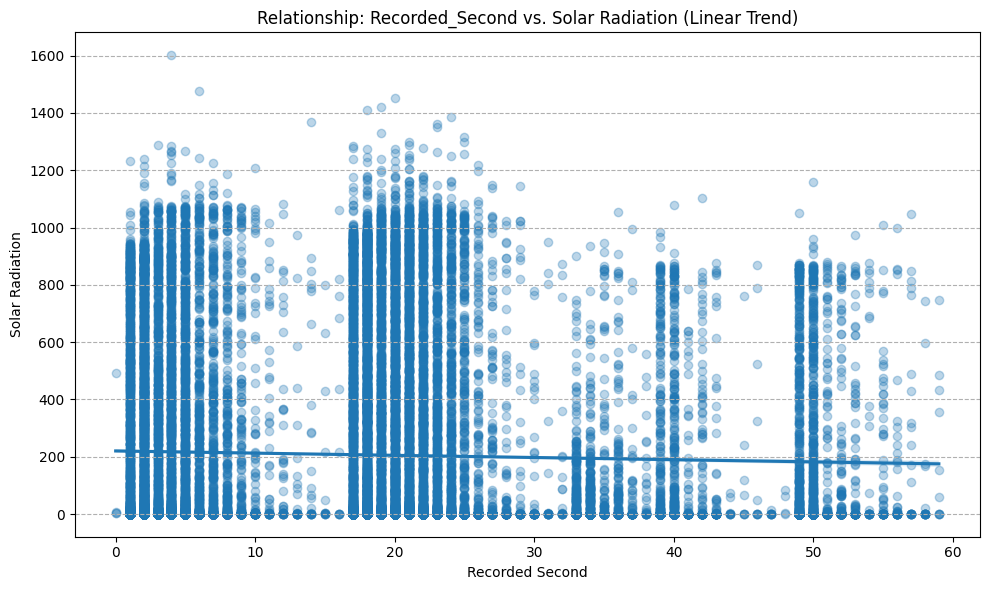

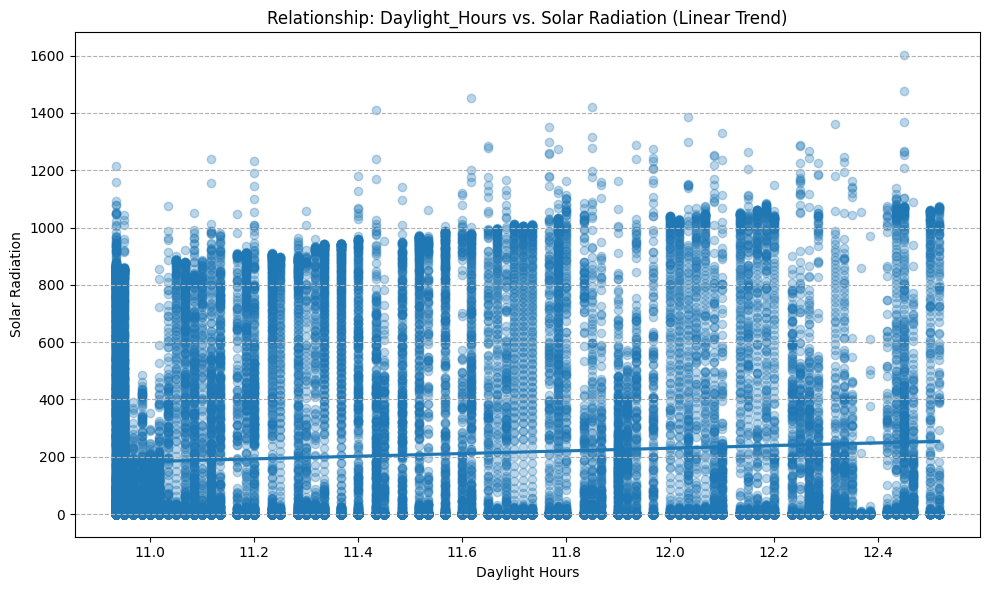

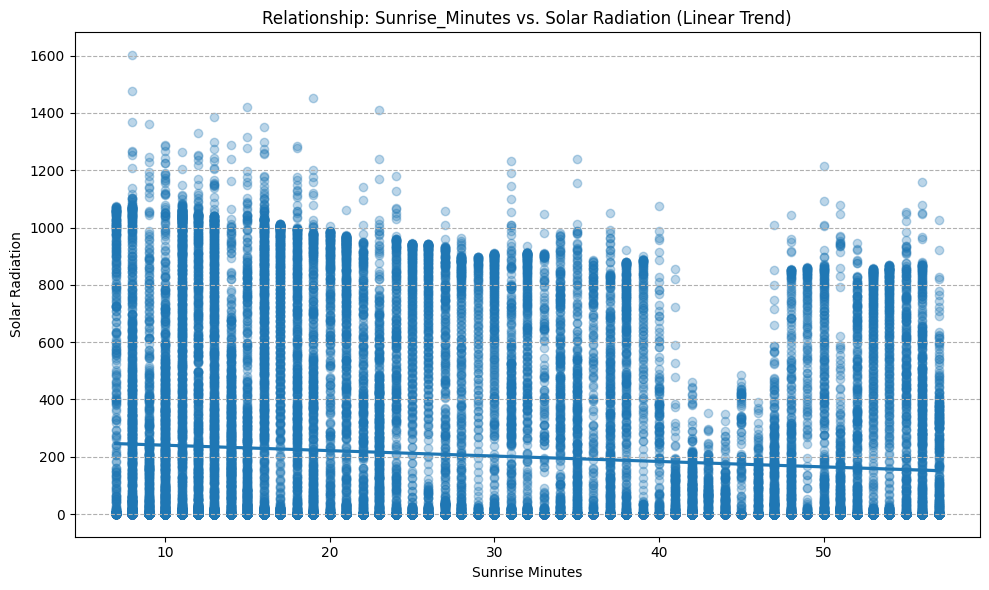

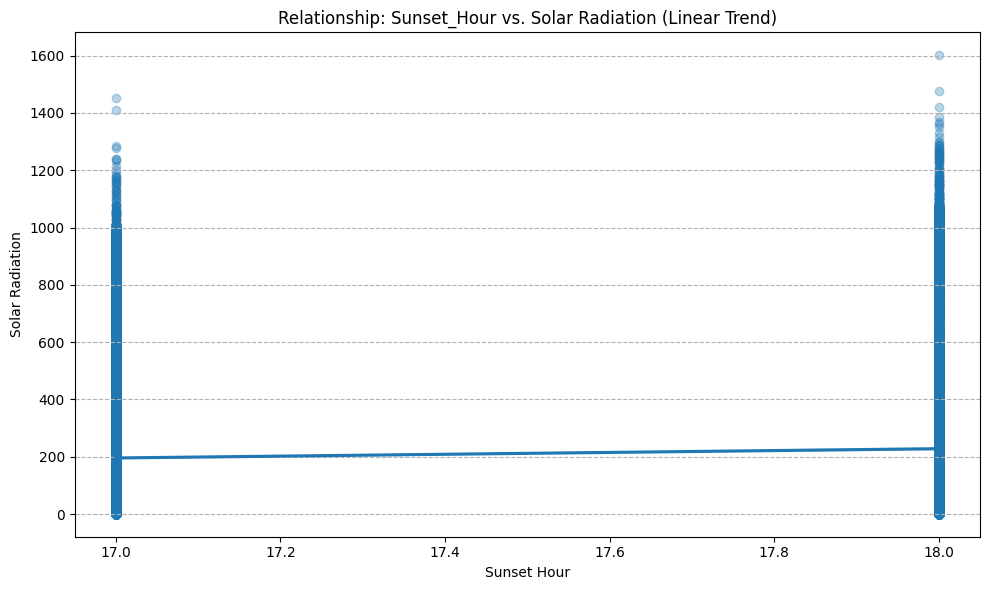

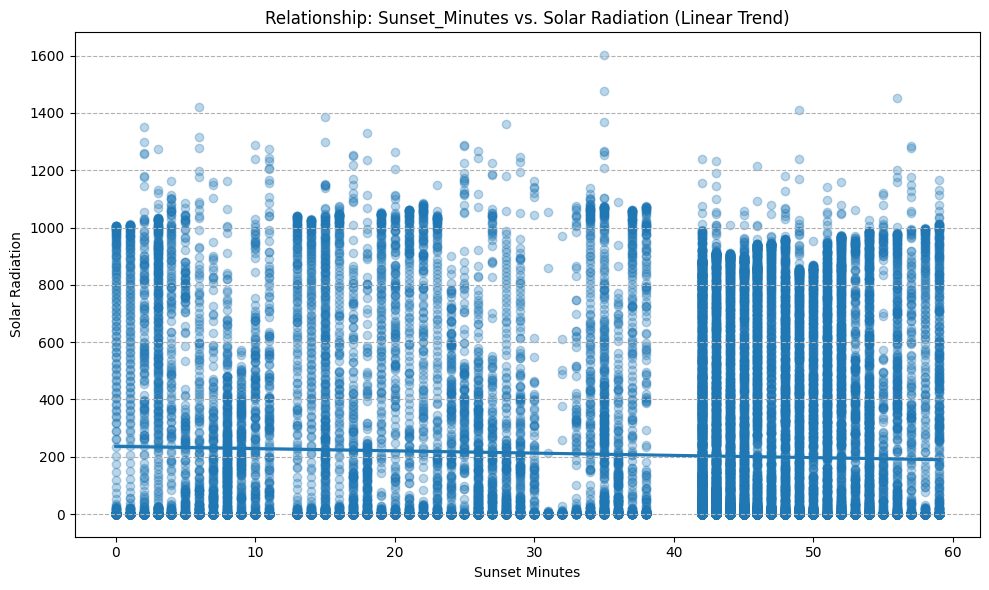

In [34]:
TARGET_COL = 'radiation'

# Columns to skip (IDs, duplicates, or non-numeric metadata)
# SKIP_COLUMNS = [TARGET_COL, 'unixtime', 'data', 'time', 'timesunrise', 'timesunset', 'col1_dt', 'col2_dt', 'recordeddatetime']

# Get the list of features to plot (clean features only)
features_to_plot = [col for col in df.columns]


# --- Plotting Loop ---

# Set a threshold to distinguish between continuous and discrete features
# (If a column has fewer than 20 unique values, treat it as discrete)
UNIQUE_VALUE_THRESHOLD = 20

for feature in features_to_plot:
    
    # 1. Determine Plot Type
    is_discrete = df[feature].nunique() < UNIQUE_VALUE_THRESHOLD
    
    plt.figure(figsize=(10, 6))

    '''
    if is_discrete:
        # Use Box Plot for discrete/categorical features (e.g., month, hour)
        sns.boxplot(x=feature, y=TARGET_COL, data=df)
        plt.title(f'Impact of {feature.title()} on Solar Radiation (Distribution)')
        
        # Adjust x-ticks for readability if there are many unique categories
        if df[feature].nunique() > 10:
             plt.xticks(rotation=45, ha='right')
    '''
    
    #else:
        # Use Regression Plot for continuous features (e.g., speed, temperature)
        # The 'reg' line shows the linear trend.
    sns.regplot(x=feature, y=TARGET_COL, data=df, scatter_kws={'alpha':0.3})
    plt.title(f'Relationship: {feature.title()} vs. Solar Radiation (Linear Trend)')

    # 2. Final Touches
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Solar Radiation')
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()

In [33]:
df.nunique()

radiation          14434
temperature           38
pressure              38
humidity              94
winddirection      17951
speed                 37
recorded_month         4
recorded_day          31
recorded_hour         24
recorded_minute       27
recorded_second       60
Daylight_Hours        75
sunrise_minutes       51
sunset_hour            2
sunset_minutes        56
dtype: int64

In [32]:
cols_to_drop = []

# Iterate through all columns in the DataFrame
for col in df.columns:
    # nunique(dropna=False) counts unique values, including NaN/NaT if present.
    # We want to check if the non-missing values are all the same.
    # If dropna=True (default), it counts unique non-missing values.
    # Let's use dropna=True to capture the common case where a column is constant.
    if df[col].nunique(dropna=True) == 1:
        cols_to_drop.append(col)
        print(f"Identified column to drop: '{col}' (Unique Value: {df[col].iloc[0]})")
    
# Check if any columns were found and drop them
if cols_to_drop:
    df.drop(columns=cols_to_drop, inplace=True)
    print(f"\nSuccessfully dropped the following {len(cols_to_drop)} columns: {cols_to_drop}")
else:
    print("\nNo columns found with only one unique non-missing value. DataFrame remains unchanged.")

df

Identified column to drop: 'recorded_year' (Unique Value: 2016)
Identified column to drop: 'sunrise_hour' (Unique Value: 6)
Identified column to drop: 'sunrise_seconds' (Unique Value: 0)
Identified column to drop: 'sunset_seconds' (Unique Value: 0)

Successfully dropped the following 4 columns: ['recorded_year', 'sunrise_hour', 'sunrise_seconds', 'sunset_seconds']


,radiation,temperature,pressure,humidity,winddirection,speed,recorded_month,recorded_day,recorded_hour,recorded_minute,recorded_second,Daylight_Hours,sunrise_minutes,sunset_hour,sunset_minutes
0,2.58,51,30.43,103,77.27,11.25,9,1,0,0,8,12.516667,7,18,38
1,2.83,51,30.43,103,153.44,9.00,9,1,0,5,10,12.516667,7,18,38
2,2.16,51,30.43,103,142.04,7.87,9,1,0,20,6,12.516667,7,18,38
3,2.21,51,30.43,103,144.12,18.00,9,1,0,25,5,12.516667,7,18,38
4,2.25,51,30.43,103,67.42,11.25,9,1,0,30,9,12.516667,7,18,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1.22,41,30.34,83,238.94,6.75,12,31,23,35,2,10.950000,57,17,54
32682,1.21,41,30.34,82,236.79,5.62,12,31,23,40,1,10.950000,57,17,54
32683,1.21,42,30.34,81,218.28,7.87,12,31,23,45,4,10.950000,57,17,54
32684,1.19,41,30.34,80,215.23,7.87,12,31,23,50,3,10.950000,57,17,54


In [39]:
df.loc[0]

radiation            2.580000
temperature         51.000000
pressure            30.430000
humidity           103.000000
winddirection       77.270000
speed               11.250000
recorded_month       9.000000
recorded_day         1.000000
recorded_hour        0.000000
recorded_minute      0.000000
recorded_second      8.000000
Daylight_Hours      12.516667
sunrise_minutes      7.000000
sunset_hour         18.000000
sunset_minutes      38.000000
Name: 0, dtype: float64

In [41]:
df.to_csv(DATA_LOCATION+INTERMEDIARY_FILE, index=False)